# Statistical Inference on Properties of Cammeo & Osmancik Rice
**Authors:** Nour Abdelfattah, Muhammad Shahbaz Murtaza, Sky Yun and Emiliano Hernández Castillo

**Group:** 47

## 1. Introduction

## 2. Preliminary Analysis

### 2.1 Loading Library Dependencies

In [116]:
library(tidyverse)   #Allows to transform and present data
library(ggplot2)     #Allows to present data vectors accordingly
library(gridExtra)   #Allows to organize presented data graphs
library(grid)        #Allows to organize presented data graphs
library(ggcorrplot)  #Allows to render correlation plot w/ according vectors

#### TESTING SOME TABLE AESTHETICS WITH THESE, WILL REMOVE IF DOESNT WORK
#install.packages('DT')
#library(DT)
#library(gt)

### 2.2 Reading and Wrangling Rice Data Set into R

In [121]:
#Reading original Rice data set from Github repository to R
url<- "https://raw.githubusercontent.com/yun-sky/stat-201-project/main/Rice_Cammeo_Osmancik.arff"
rice_data <- read.csv(url, header=FALSE, comment.char = "@", skip = 4) |>
                      type.convert(as.is= TRUE) #Converting character data type into double data type

#Assigning correct column names
colnames(rice_data) <- c("area", "perimeter", "major_axis_length", "minor_axis_length", "eccentricity", 
                            "convex_area", "extent", "class")

#Printing head of rice_data
head(rice_data)

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,convex_area,extent,class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,15231,525.579,229.7499,85.09379,0.9288820,15617,0.5728955,Cammeo
2,14656,494.311,206.0201,91.73097,0.8954050,15072,0.6154363,Cammeo
3,14634,501.122,214.1068,87.76829,0.9121181,14954,0.6932588,Cammeo
4,13176,458.343,193.3374,87.44839,0.8918609,13368,0.6406690,Cammeo
5,14688,507.167,211.7434,89.31245,0.9066909,15262,0.6460239,Cammeo
6,13479,477.016,200.0531,86.65029,0.9013283,13786,0.6578973,Cammeo


### 2.3 Exploratory Data Analysis

We want to ensure that the class of rice is related to some of the properties available in the dataset. Particularly, we are interested in whether the class of rice is related to the perimeter. We will choose these variables accordingly by calculating the **point-biserial correlation** coefficient between the class of rice and all the continuous variables in the data set. The correlation plot is outlined below. 

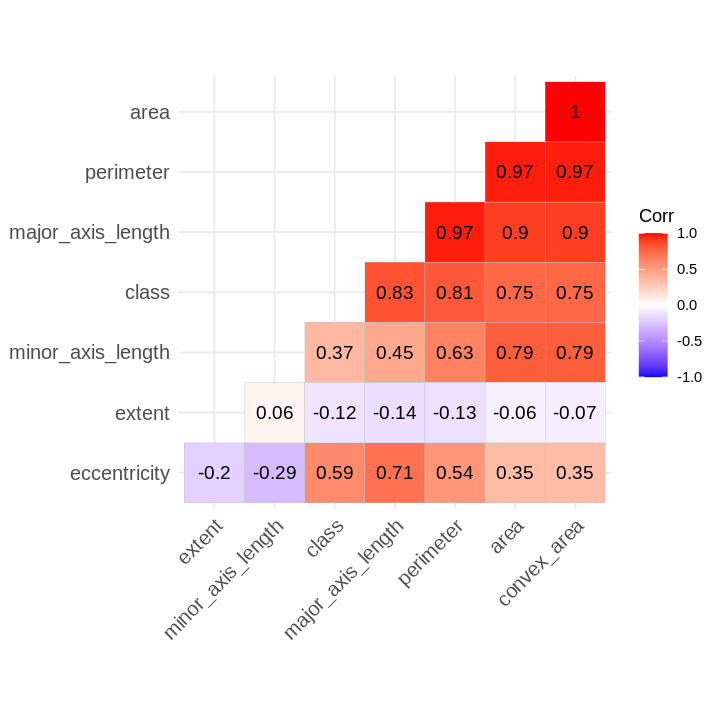

In [119]:
options(repr.plot.width = 6, repr.plot.height = 6)

#Converting Data set into binary class variable and correct vectors for Corr plot
binary_data <- rice_data |>
     mutate(class = ifelse(class == "Cammeo",1,0))|>
     cor(use="complete.obs") 

#Plotting Corr plot
ggcorrplot(binary_data, 
           hc.order = TRUE, 
           type = "lower",
           lab = TRUE)

Lets focus on the correlation coefficients containing `class`. We can observe that the `major_axis_length` and the `perimeter` of a rice grain is highly correlated with `class`, giving a correlation coefficient of 0.83 and 0.81 respectively. Thus, we will use these properties of rice as our variables of interest in order to determine the different observable properties of cammeo and osmancik Rice. To further analyze this correlation, we will plot the side-by-side boxplots for each of our variables of interest. 

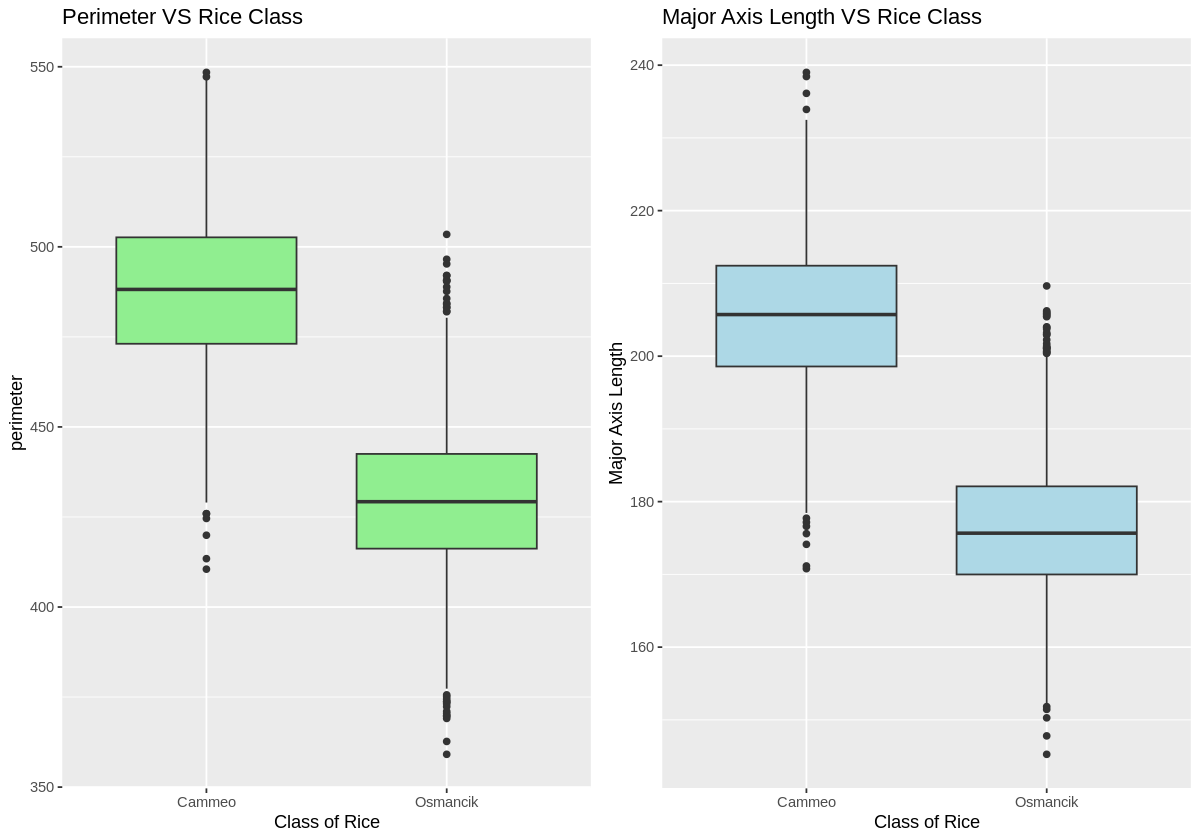

In [124]:
options(repr.plot.width = 10, repr.plot.height = 7)

#Plotting major_axis_length vs class box plot
mal_plot <- ggplot(rice_data, aes(x = class, y = major_axis_length)) +
    geom_boxplot(fill = "lightblue") +
    xlab("Class of Rice") +
    ylab("Major Axis Length") +
    ggtitle("Major Axis Length VS Rice Class")


#Plotting perimeter vs class boxplot
peri_plot <- ggplot(rice_data, aes(x = class, y = perimeter)) +
    geom_boxplot(fill = "lightgreen") +
    xlab("Class of Rice") +
    ggtitle("Perimeter VS Rice Class")

#Arranges the plots in a neater format
grid.arrange(peri_plot, mal_plot, ncol = 2)

### 2.3.1 Data Parameter Estimates

In [47]:
# Calculating the mean and standard deviation for each selected class
summary_rice <- rice_data |>
    group_by(class) |>
    summarize(mean_perimeter = mean(perimeter), mean_mal = mean(major_axis_length), 
              sd_perimeter = sd(perimeter), sd_mal = sd(major_axis_length))

summary_rice

class,mean_perimeter,mean_mal,sd_perimeter,sd_mal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Cammeo,487.4389,205.4786,22.18152,10.333854
Osmancik,429.4155,176.2878,20.15439,9.362405


## 3. Methods: Plan

## References